Code slightly adapted from https://github.com/itoledor/coronavirus/blob/master/code/covid19-chile_03_plot-data.R

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(rvest))
suppressPackageStartupMessages(library(magrittr))
suppressPackageStartupMessages(library(janitor))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(rtweet))

In [2]:
options(repr.plot.width = 12, repr.plot.height = 8)

In [3]:
paleta <- c(brewer.pal(n = 8, 'YlOrRd') %>% rev, brewer.pal(n = 9, 'YlGnBu') %>% tail(-1)) %>% unique()

In [4]:
covid19_chile <- read_rds("../../data/covid-19-chile/covid19_chile.rds")

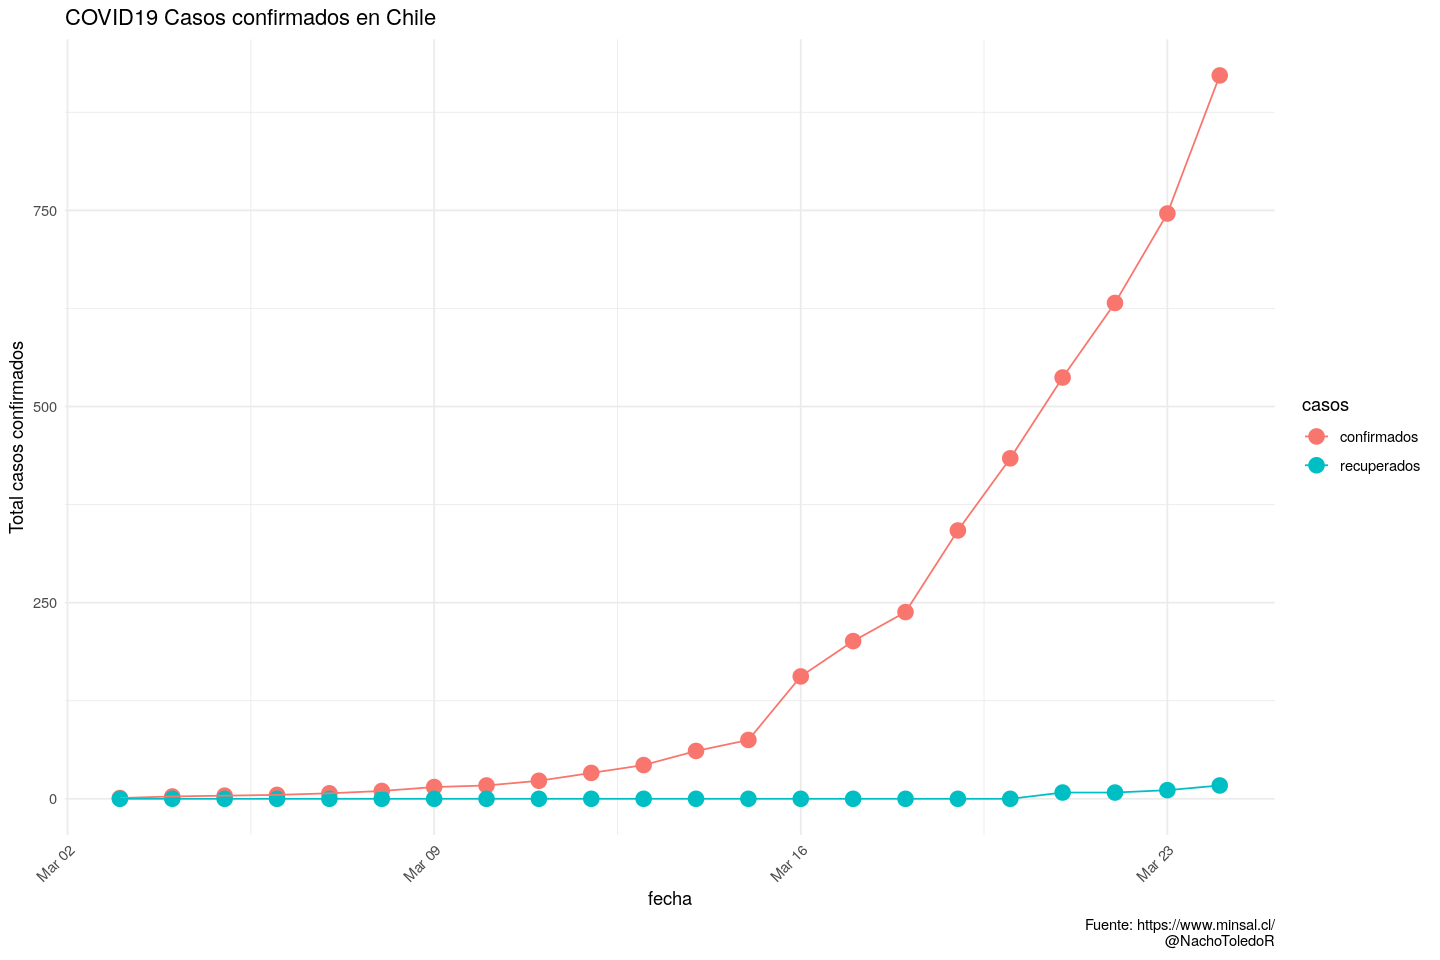

In [5]:
covid19_chile_gg_1 <- covid19_chile      %>% filter(region == 'Total')
covid19_chile_gg_1 <- covid19_chile_gg_1 %>% pivot_longer(starts_with('casos'), names_to = 'casos', names_prefix = 'casos_', values_to = 'Total')
covid19_chile_gg_1 <- covid19_chile_gg_1 %>% filter(casos %in% c('totales', 'recuperados'))
covid19_chile_gg_1 <- covid19_chile_gg_1 %>% mutate(casos = casos %>% str_replace('totales','confirmados'))
covid19_chile_gg_1 <- covid19_chile_gg_1 %>% ggplot(aes(x = fecha, y = Total, color = casos))
covid19_chile_gg_1 <- covid19_chile_gg_1 %+% geom_point(size = 4)
covid19_chile_gg_1 <- covid19_chile_gg_1 %+% geom_line()
covid19_chile_gg_1 <- covid19_chile_gg_1 %+% labs(title   = "COVID19 Casos confirmados en Chile")
covid19_chile_gg_1 <- covid19_chile_gg_1 %+% labs(y       = "Total casos confirmados")
covid19_chile_gg_1 <- covid19_chile_gg_1 %+% labs(caption	= "Fuente: https://www.minsal.cl/\n @NachoToledoR")
covid19_chile_gg_1 <- covid19_chile_gg_1 %+% theme_minimal()
covid19_chile_gg_1 <- covid19_chile_gg_1 %+% theme(axis.text.x = element_text(angle = 45, hjust = 1))
covid19_chile_gg_1 

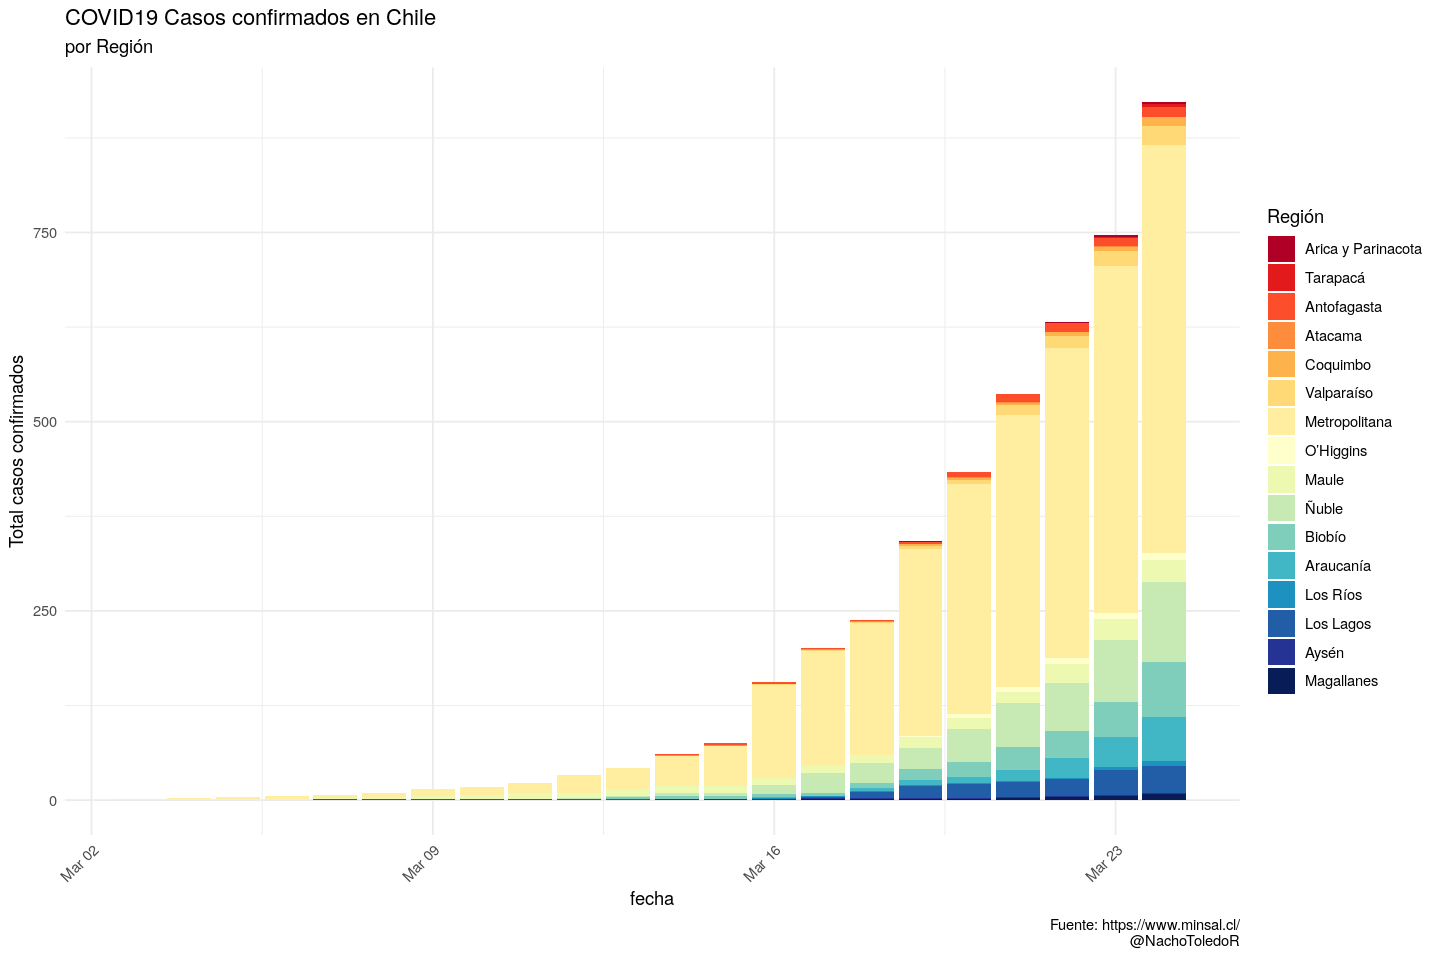

In [6]:
covid19_chile_gg_2 <- covid19_chile      %>% filter(region != 'Total')
covid19_chile_gg_2 <- covid19_chile_gg_2 %>% ggplot(aes(x = fecha, y = casos_totales, fill = region %>% fct_inorder))
covid19_chile_gg_2 <- covid19_chile_gg_2 %+% geom_col(position = "stack")
covid19_chile_gg_2 <- covid19_chile_gg_2 %+% labs(title = "COVID19 Casos confirmados en Chile", subtitle = "por Región", fill = "Región")
covid19_chile_gg_2 <- covid19_chile_gg_2 %+% labs(y       = "Total casos confirmados")
covid19_chile_gg_2 <- covid19_chile_gg_2 %+% labs(caption	= "Fuente: https://www.minsal.cl/\n @NachoToledoR")
covid19_chile_gg_2 <- covid19_chile_gg_2 %+% theme_minimal()
covid19_chile_gg_2 <- covid19_chile_gg_2 %+% theme_minimal()
covid19_chile_gg_2 <- covid19_chile_gg_2 %+% scale_fill_manual(values = paleta)
covid19_chile_gg_2 <- covid19_chile_gg_2 %+% theme(axis.text.x = element_text(angle = 45, hjust = 1))
covid19_chile_gg_2 